In [43]:
#Edited by Niklas Brake from original by Gantumur Tsogtgerel, with help from Tuguldur Sukhbold
import numpy as np
import matplotlib.pyplot as plt
import random as rn
from scipy.special import erf

We study the effect of inexact arithmetic on computation of the errro function (erf) series $^1$

$$
erf(x) = \frac{2}{\sqrt{\pi}} \left ( x - \frac{x^3}{3} + \frac{x^5}{10} - \frac{x^7}{42} + \ldots \right ).
$$

taken from which is approximated by the Taylor polynomial 

$$
T_n(x) =  \frac{2}{\sqrt{\pi}} \left (x - \frac{x^3}{3} + \ldots + \frac{(-1)^nx^{2n+1}}{n!(2n+1)} \right ) .
$$

Each term of the Taylor polynomial is computed with random error, 
uniformly distributed with relative amplitude $\varepsilon$.
We can think of $\varepsilon$ as modeling the machine precision.
A typical choice below is $\varepsilon=0.1$.
This of course greatly exaggaretes roundoff errors, but illustrates the phenomenon nicely.
In this setting, the built-in computation of $e^x$ can be taken as exact.


* $\texttt{expser}(n,x,\varepsilon)$ computes $T_n(x)$ with each of its term having random error, 
uniformly distributed with relative amplitude $\varepsilon$.
* $\texttt{expserlist}(n,xlist,\varepsilon)$ is a version of $\texttt{expser}(n,x,\varepsilon)$ that works with a list of $x$.
* The next 3 functions work with lists of $x$, $n$, and $\varepsilon$, respectively, 
but they all compute $e^x-T_n(x)$, where $T_n(x)$ has the aforementioned perturbation. 

$^1$ Uznanski, Dan. "Series Expansion." From MathWorld--A Wolfram Web Resource, created by Eric W. Weisstein. http://mathworld.wolfram.com/SeriesExpansion.html

# Preliminaries

In [50]:
def expser(n,x,eps=0):
#truncated Maclaurin series (i.e., Taylor polynomial) for erf
# n - degree of the Taylor polynomial
# x - the argument
# eps - relative error in computation of the series terms, modeled by uniform noise
    b=float(x)
    y=b
    for i in range(1,n+1):
        b*=-float(x**2)/i
        r=2*eps*rn.random()-eps
        y+=b/(2*i+1)*(1.+r)
    return 2*y/np.sqrt(np.pi)

In [51]:
def expserlist(n,xlist,eps=0):
#works with *list* of x
    ylist = []
    for x in xlist:
        ylist.append(expser(n,x,eps))
    return ylist

In [52]:
def errxlist(n,xlist,eps):
#difference between Tn(x) and e^x
#works with *list* of x
    yy = []
    for x in xlist: 
        yy.append(expser(n,x,eps)-erf(x))
    return yy

In [53]:
def errelist(n,x,elist):
#difference between Tn(x) and e^x
#works with *list* of eps
    yy = []
    for eps in elist: 
        yy.append(expser(n,x,eps)-erf(x))
    return yy

In [54]:
def errnlist(nlist,x,eps):
#difference between Tn(x) and e^x
#works with *list* of n
    yy = []
    for n in nlist: 
        yy.append(expser(n,x,eps)-erf(x))
    return yy

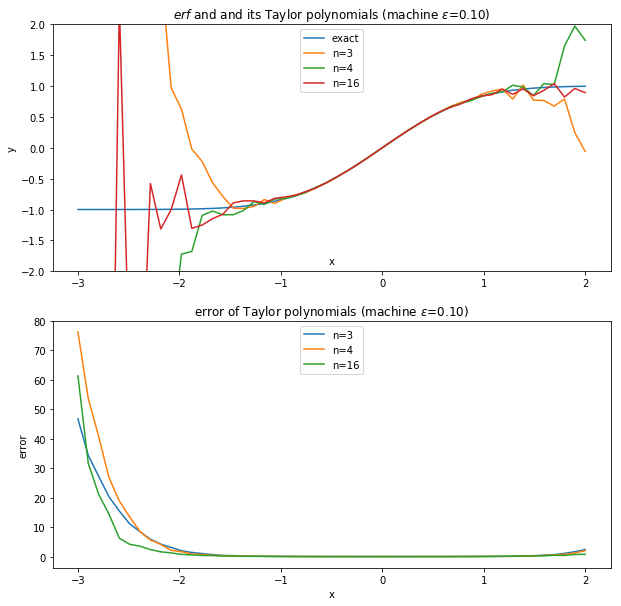

In [68]:
xlist = np.linspace(-3, 2, 50)
nlist = [3,4,16]
eps=.1
kmax=30

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.plot(xlist,erf(xlist),label='exact')
for n in nlist: 
    ax1.plot(xlist,expserlist(n,xlist,eps),label='n=%d'%n)
plt.legend()
for n in nlist: 
    y=np.abs(errxlist(n,xlist,eps))
    for k in range(1,kmax):
        z=np.abs(errxlist(n,xlist,eps))
        y=np.maximum(y,z)
    ax2.plot(xlist,y,label='n=%d'%n)

ax1.set_title(r'$erf$ and and its Taylor polynomials (machine $\varepsilon$=%.2f)'%eps)
ax1.xaxis.set_label_coords(.5,.06)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_ylim([-2,2])
ax1.legend(loc="upper center")
ax2.set_title(r'error of Taylor polynomials (machine $\varepsilon$=%.2f)'%eps)
ax2.set_xlabel('x')
ax2.set_ylabel('error')
ax2.legend(loc="upper center")
plt.show()

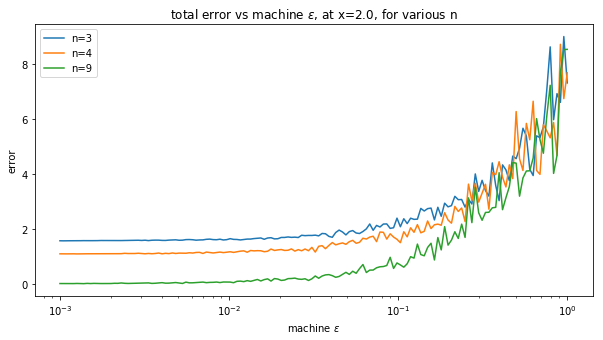

In [56]:
nlist = [3,4,9]
elist = np.logspace(-3, 0, 150)
x=2.
kmax=20

plt.figure(figsize=(10,5))
for n in nlist:
    y=np.abs(errelist(n,x,elist))
    for k in range(1,kmax):
        z=np.abs(errelist(n,x,elist))
        y=np.maximum(y,z)
    plt.plot(elist,y,label='n=%d'%n)

plt.xscale('log')
plt.title(r'total error vs machine $\varepsilon$, at x=%.1f, for various n'%x)
plt.xlabel(r'machine $\varepsilon$')
plt.ylabel('error')
plt.legend()
plt.show()

Note there is not an clear relationship between n and error as seen in the $e^x$ case. Here n = 9 has a higher error than n = 4, but a lower error then n = 3 (although it begins to surpase n = 3 with a higher machine $\varepsilon$. This is seemingly because the approximation error from the Taylor polynomial is being overshadowed by the error accumulated in the operations.

# Investigation of error vs *n* as a function of $\varepsilon$ and *x*

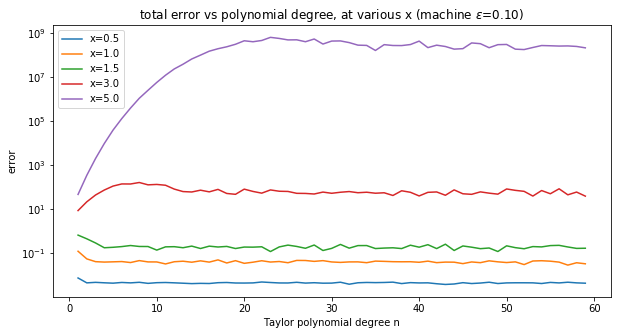

In [81]:
xlist = [0.5,1,1.5,3,5]
nlist=range(1,60)
eps=.1
kmax=20

plt.figure(figsize=(10,5))
for x in xlist:
    y=np.abs(errnlist(nlist,x,eps))
    for k in range(1,kmax):
        z=np.abs(errnlist(nlist,x,eps))
        y=np.maximum(y,z)
    plt.plot(nlist,y,label='x=%.1f'%x)

plt.yscale('log')
#plt.xscale('log')
plt.title(r'total error vs polynomial degree, at various x (machine $\varepsilon$=%.2f)'%eps)
plt.xlabel('Taylor polynomial degree n')
plt.ylabel('error')
plt.legend()
plt.show()

The value of x seems to have a much more dramatic effect on the error than it did in the $e^x$ case. A difference of 2 orders of magnitude in the $e^x$ case is here 8 orders of magnitude between x=1 and x=5. Furthermore, there is clearly a well behaving regime where higher n decreases the error. However, for x>1.5, increasing n actually increases the error. This is clear from figure 1 which shows higher degree polynomials have more dramatic fluctuations away from the origin.


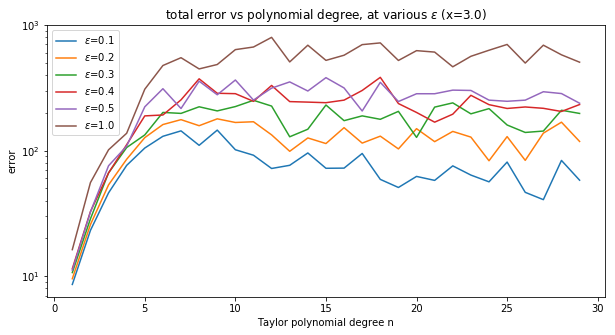

In [58]:
x = 3
nlist=range(1,30)
epslist=[0.1,0.2,0.3,0.4,0.5,1]
kmax=20

plt.figure(figsize=(10,5))
for eps in epslist:
    y=np.abs(errnlist(nlist,x,eps))
    for k in range(1,kmax):
        z=np.abs(errnlist(nlist,x,eps))
        y=np.maximum(y,z)
    plt.plot(nlist,y,label='$\epsilon$=%.1f'%eps)

plt.yscale('log')
#plt.xscale('log')
plt.title(r'total error vs polynomial degree, at various $\epsilon$ (x=%.1f)'%x)
plt.xlabel('Taylor polynomial degree n')
plt.ylabel('error')
plt.legend()
plt.show()

Our steady state error increases with increasing machine $\varepsilon$. This is expected, and consistent with what we observed in the case $e^x$.

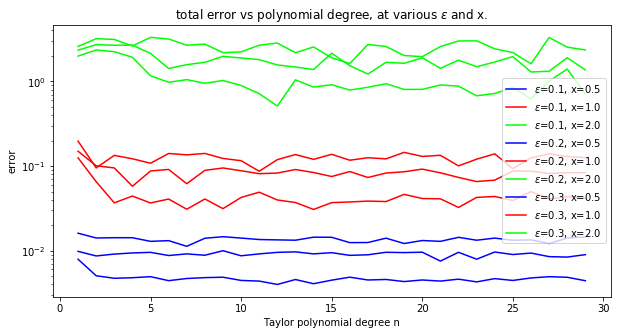

In [80]:
xlist = [0.5,1,2]
nlist=range(1,30)
epslist=[0.1,0.2,0.3]
kmax=20

plt.figure(figsize=(10,5))

for eps in epslist:
    for x in xlist:
        y=np.abs(errnlist(nlist,x,eps))
        for k in range(1,kmax):
            z=np.abs(errnlist(nlist,x,eps))
            y=np.maximum(y,z)
#       Cycle color so that all x have same color and all eps with same x have different colors
        clr = [0,0,0]
        clr[xlist.index(x)-1] = 1
        plt.plot(nlist,y,color=clr,label='$\epsilon$=%.1f, x=%.1f' %(eps,x))

plt.yscale('log')
#plt.xscale('log')
plt.title(r'total error vs polynomial degree, at various $\epsilon$ and x.')
plt.xlabel('Taylor polynomial degree n')
plt.ylabel('error')
plt.legend(loc='right')
plt.show()

Both $\varepsilon$ and x affects the steady state total error. However, the value of x plays a larger role in the error than $\varepsilon$

# Edited Code to Investigate Relative Error
## Preliminaries

In [69]:
def rerrxlist(n,xlist,eps):
# Relative error: |T(x)-erf(x)|/erf(x)
#works with *list* of x
    yy = []
    for x in xlist: 
        yy.append(abs(expser(n,x,eps)-erf(x))/erf(x))
    return yy

def rerrelist(n,x,elist):
# Relative error: |T(x)-erf(x)|/erf(x)
#works with *list* of eps
    yy = []
    for eps in elist: 
        yy.append(abs(expser(n,x,eps)-erf(x))/erf(x))
    return yy

def rerrnlist(nlist,x,eps):
# Relative error: |T(x)-erf(x)|/erf(x)
#works with *list* of n
    yy = []
    for n in nlist: 
        yy.append(abs(expser(n,x,eps)-erf(x))/erf(x))
    return yy

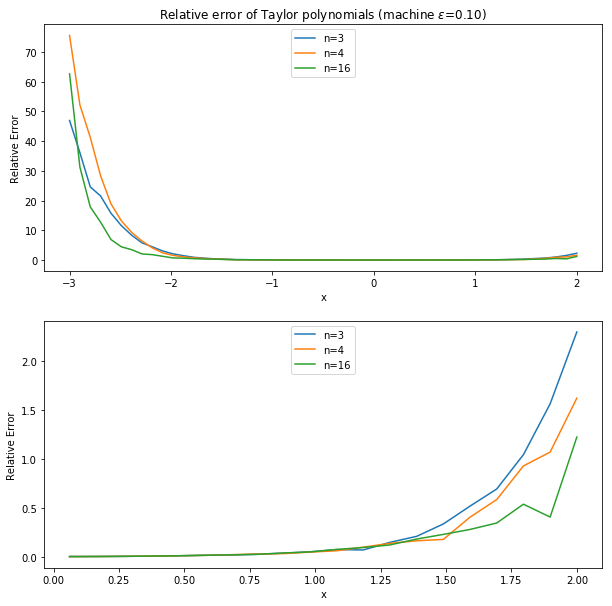

In [70]:
xlist = np.linspace(-3, 2, 50)
nlist = [3,4,16]
eps=.1
kmax=30

fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

for n in nlist:
#   Replace error functions with relative error functions
    y=np.abs(rerrxlist(n,xlist,eps))
    for k in range(1,kmax):
        z=np.abs(rerrxlist(n,xlist,eps))
        y=np.maximum(y,z)
    ax1.plot(xlist,y,label='n=%d'%n)
    ax2.plot(xlist[30:50],y[30:50],label='n=%d'%n)

ax1.set_title(r'Relative error of Taylor polynomials (machine $\varepsilon$=%.2f)'%eps)
ax1.set_xlabel('x')
ax1.set_ylabel('Relative Error')
ax1.legend(loc="upper center")
ax2.set_xlabel('x')
ax2.set_ylabel('Relative Error')
ax2.legend(loc="upper center")
plt.show()

erf is symmetric about the origin, however our estimate fluctuates wildly for negative values of x (see figure 1). Therefore the error at the beginning is worse than the error at the end. However, for $|x|>1.5$, $erf(x)\approx 1$, so for the values of x at which the error is the worst, there is not much variation from the total error. 

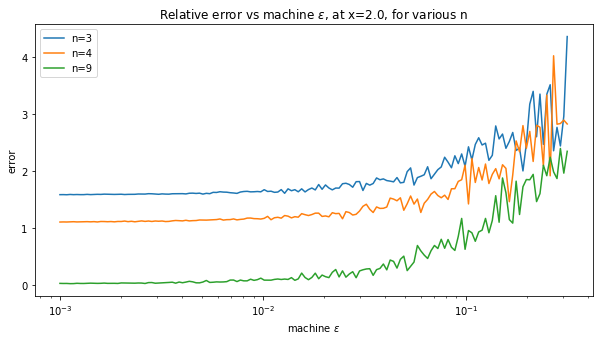

In [71]:
nlist = [3,4,9]
elist = np.logspace(-3, -.5, 150)
x=2.
kmax=20

plt.figure(figsize=(10,5))
for n in nlist:
#   Replace total error with relative error function
    y=np.abs(rerrelist(n,x,elist))
    for k in range(1,kmax):
        z=np.abs(rerrelist(n,x,elist))
        y=np.maximum(y,z)
    plt.plot(elist,y,label='n=%d'%n)

plt.xscale('log')
plt.title(r'Relative error vs machine $\varepsilon$, at x=%.1f, for various n'%x)
plt.xlabel(r'machine $\varepsilon$')
plt.ylabel('error')
plt.legend()
plt.show()

All this data is taken at the same x value, hence $e^x$ is the same. Therefore, this data is simply a scaled copy of the total error results.
## Investigation of `relative` error vs *n* as a function of $\varepsilon$ and *x*

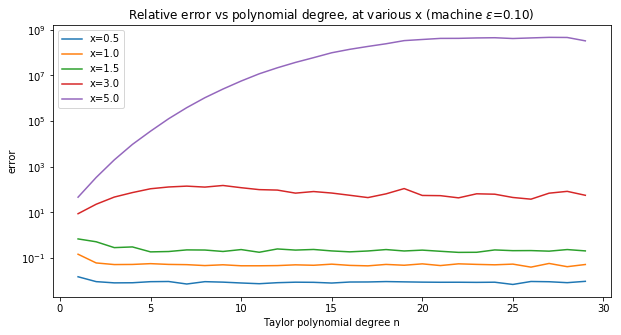

In [83]:
xlist = [0.5,1,1.5,3,5]
nlist=range(1,30)
eps=.1
kmax=20

plt.figure(figsize=(10,5))
for x in xlist:
#   Replace function with relative error
    y=np.abs(rerrnlist(nlist,x,eps))
    for k in range(1,kmax):
        z=np.abs(rerrnlist(nlist,x,eps))
        y=np.maximum(y,z)
    plt.plot(nlist,y,label='x=%.1f'%x)

plt.yscale('log')
#plt.xscale('log')
plt.title(r'Relative error vs polynomial degree, at various x (machine $\varepsilon$=%.2f)'%eps)
plt.xlabel('Taylor polynomial degree n')
plt.ylabel('error')
plt.legend()
plt.show()

For x > 1.5, erf(x) is approximately constant (and close to 1), so the relative error does not vary much from the total error.

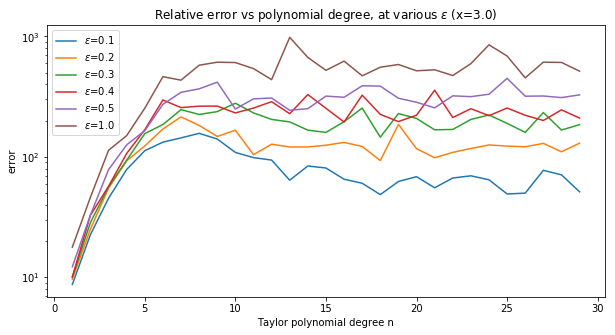

In [84]:
x = 3
nlist=range(1,30)
epslist=[0.1,0.2,0.3,0.4,0.5,1]
kmax=20

plt.figure(figsize=(10,5))
for eps in epslist:
#   Replace functions with relative error
    y=np.abs(rerrnlist(nlist,x,eps))
    for k in range(1,kmax):
        z=np.abs(rerrnlist(nlist,x,eps))
        y=np.maximum(y,z)
    plt.plot(nlist,y,label='$\epsilon$=%.1f'%eps)

plt.yscale('log')
#plt.xscale('log')
plt.title(r'Relative error vs polynomial degree, at various $\epsilon$ (x=%.1f)'%x)
plt.xlabel('Taylor polynomial degree n')
plt.ylabel('error')
plt.legend()
plt.show()

This appears unaffected. This makes sense, because we are dividing all data points by the same number, given that all data points are at the same x value, hence same value of $erf(x)$.

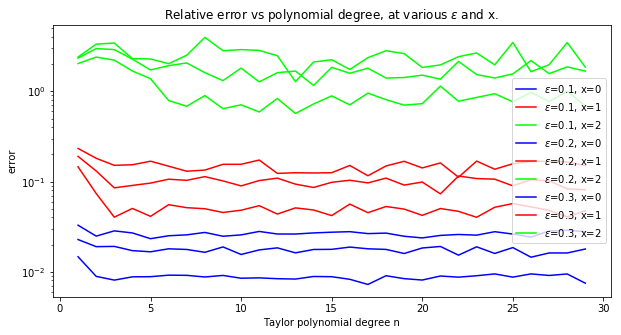

In [88]:
xlist = [0.5,1,2]
nlist=range(1,30)
epslist=[0.1,0.2,0.3]
kmax=20

plt.figure(figsize=(10,5))

for eps in epslist:
    for x in xlist:
#       Error replaced with relative error
        y=np.abs(rerrnlist(nlist,x,eps))
        for k in range(1,kmax):
            z=np.abs(rerrnlist(nlist,x,eps))
            y=np.maximum(y,z)
#       Cycle color so that all x have same color and all eps with same x have different colors
        clr = [0,0,0]
        clr[xlist.index(x)-1] = 1
        plt.plot(nlist,y,color=clr,label='$\epsilon$=%.1f, x=%d' %(eps,x))

plt.yscale('log')
#plt.xscale('log')
plt.title(r'Relative error vs polynomial degree, at various $\epsilon$ and x.')
plt.xlabel('Taylor polynomial degree n')
plt.ylabel('error')
plt.legend(loc='right')
plt.show()

There is not much difference between this plot and that for the total error. Given that the previous two plots were not very different, this should be expected.